# Data Preprocessing

Для того что бы подготовить наш датасет к дальнейшим исследованиям, загрузим сначала библиотеки которые нам пригодятся для подготовки. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('insurance_claimsV1.csv', sep=',')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
#Прежде чем начать подготовку датасета к предстоящейму анализу избавимся от переменных которые не несут в себе смысловой информации, которая влияла бы на прогнозы далее. Было принято решение удалить следующие переменные: 
#insured_zip,policy_number,auto_model,incident_state,incident_date,incident_location,policy_state. Это качественные переменные которые характеризует сам инцидент. 

In [5]:
df = df.drop(['insured_zip','policy_number','auto_model','incident_state','incident_date','incident_location','policy_state','policy_bind_date','incident_city'], axis='columns', inplace=False)
df.head(5)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,NaN,5070,780,780,3510,Mercedes,2007,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,2009,N


Выведем статистику по числовым переменным, где сразу увидим, что в покрайней мере в переменной police_report_available имеются пропущенные значения. Для того что бы далее получить адекватные модели и прогнозы, нам нужно будет избавиться от пропущенных значений в датасете. 

In [6]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Для того что бы проверить в каких переменных присутсвуют пропуски, запустим команду которая находится ниже. Она покажет общее количество пропущенных значений для каждой переменной.

Как видим пропущенные значения присутсвуют в трех переменных, чего не было показано в статистике по числовым переменным.
Переменная property_damage имеет в общей сумме 360 пропущенныз значений, что составляет 36% от общей суммы значений. Соотвественно police_report_avaialble имеет 343 пропущенных значений, что составляет 34,3% и collision_type имеет 178 пропущенных значений, что составляет 17,8%. 


In [7]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178
months_as_customer,0,0.000
authorities_contacted,0,0.000
auto_year,0,0.000
auto_make,0,0.000
vehicle_claim,0,0.000
property_claim,0,0.000
injury_claim,0,0.000


Согласно полученным данным, пропущенные данные имеются только в качественных переменных. Соотвественно, нам нужно избавиться от них. Для этого используем метод заполнения most frequent - самые частые. С помощью этого метода будут отобраны наиболее часто встречающиеся ответы и пропуски будут заполнены этим значением. 

In [8]:
# Function Missing data (non-numeric)
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

In [9]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_char(df)

In [10]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
months_as_customer,0,0.0
age,0,0.0
auto_year,0,0.0
auto_make,0,0.0
vehicle_claim,0,0.0
property_claim,0,0.0
injury_claim,0,0.0
total_claim_amount,0,0.0
police_report_available,0,0.0
witnesses,0,0.0


In [11]:
# Cheking categorical data. Поскольку наш датасет содержит качественные переменныые какждая из которых имеет по несколько уникальных признаков,нам необходимо их закодировать. Для этого найдем в каждой переменной уникальные значения.
dfs = df[['insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','police_report_available','auto_make','fraud_reported','policy_csl','insured_education_level']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
8,property_damage,2,"[YES, NO]",object
12,policy_csl,3,"[250/500, 100/300, 500/1000]",object
9,police_report_available,2,"[YES, NO]",object
0,insured_sex,2,"[MALE, FEMALE]",object
3,insured_relationship,6,"[husband, other-relative, own-child, unmarried...",object
1,insured_occupation,14,"[craft-repair, machine-op-inspct, sales, armed...",object
2,insured_hobbies,20,"[sleeping, reading, board-games, bungie-jumpin...",object
13,insured_education_level,7,"[MD, PhD, Associate, Masters, High School, Col...",object
4,incident_type,4,"[Single Vehicle Collision, Vehicle Theft, Mult...",object
6,incident_severity,4,"[Major Damage, Minor Damage, Total Loss, Trivi...",object


In [12]:
# Encoding
pd = {'NO':0,'YES':1}
pc = {'250/500':0,'100/300':1,'500/1000':2}
pra = {'NO':0,'YES':1}
ins = {'MALE':0,'FEMALE':1}
inr = {'husband':0,'other-relative':1,'own-child':2,'unmarried':3,'not-in-family':4,'wife':5}
ino = {'machine-op-inspct':0,'prof-specialty':1,'tech-support':2,'adm-clerical':3,'armed-forces':3,'craft-repair':3,'exec-managerial':3,'farming-fishing':3,'handlers-cleaners':3,'other-service':3,'priv-house-serv':3,'protective-serv':3,'sales':3,'transport-moving':3}
inh = {'reading':0,'paintball':1,'bungie-jumping':2,'base-jumping':3,'basketball':3,'board-games':3,'camping':3,'chess':3,'cross-fit':3,'dancing':3,'exercise':3,'golf':3,'hiking':3,'kayaking':3,'movies':3,'polo':3,'skydiving':3,'sleeping':3,'video-games':3,'yachting':3}
inel = {'Associate':0,'College':1,'High School':2,'JD':3,'Masters':3,'MD':3,'PhD':3}
inty = {'Single Vehicle Collision':0,'Vehicle Theft':1,'Multi-vehicle Collision':2,'Parked Car':3}
inse = {'Major Damage':0,'Minor Damage':1,'Total Loss':2,'Trivial Damage':3}
fr = {'N':0,'Y':1}
colt = {'Side Collision':0,'Rear Collision':1,'Front Collision':2}
aum =  {'Dodge':0,'Saab':1,'Suburu':2,'Accura':3,'Audi':3,'BMW':3,'Chevrolet':3,'Ford':3,'Honda':3,'Jeep':3,'Mercedes':3,'Nissan':3,'Toyota':3,'Volkswagen':3}
authc = {'Police':0,'None':1,'Fire':2,'Other':3,'Ambulance':4}

df['property_damage'] = df['property_damage'].map(pd)
df['policy_csl'] = df['policy_csl'].map(pc)
df['police_report_available'] = df['police_report_available'].map(pra)
df['insured_sex'] = df['insured_sex'].map(ins)
df['insured_relationship'] = df['insured_relationship'].map(inr)
df['insured_occupation'] = df['insured_occupation'].map(ino)
df['insured_hobbies'] = df['insured_hobbies'].map(inh)
df['insured_education_level'] = df['insured_education_level'].map(inel)
df['incident_type'] = df['incident_type'].map(inty)
df['incident_severity'] = df['incident_severity'].map(inse)
df['fraud_reported'] = df['fraud_reported'].map(fr)
df['collision_type'] = df['collision_type'].map(colt)
df['auto_make'] = df['auto_make'].map(aum)
df['authorities_contacted'] = df['authorities_contacted'].map(authc)

Для того что бы получить максимально точный результат, избавимся от выбросов в датасете. 

In [13]:
# Function Outliers избавление от выбросов 
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [14]:
# Outliers 
df = outliers(df)
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.949000,1136.000000,1256.476176,1.091898e+06,0.537000,2.161000,2.473000,2.642822,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7397.773749,37928.950000,2.520000,2005.103000,0.247000
std,115.113174,9.140287,0.805635,611.864673,243.570287,2.266996e+06,0.498879,1.118181,0.989065,0.839379,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4818.993582,18886.252893,0.943658,6.015861,0.431483
min,0.000000,19.000000,0.000000,500.000000,523.903965,-1.000000e+06,0.000000,0.000000,0.000000,0.075351,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.000000,1000.000000,1257.200000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,3.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,3.000000,2010.000000,0.000000
max,479.000000,64.000000,2.000000,2000.000000,1987.807651,7.993220e+06,1.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,21873.748536,79560.000000,3.000000,2015.000000,1.000000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [15]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.

In [16]:
# Outliers
df = outliers(df)
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.949000,1136.000000,1256.479248,1.090393e+06,0.537000,2.161000,2.473000,2.645980,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7397.754754,37928.950000,2.520000,2005.103000,0.247000
std,115.113174,9.140287,0.805635,611.864673,243.557139,2.262438e+06,0.498879,1.118181,0.989065,0.829743,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4818.936505,18886.252893,0.943658,6.015861,0.431483
min,0.000000,19.000000,0.000000,500.000000,525.765314,-1.000000e+06,0.000000,0.000000,0.000000,0.124685,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.000000,1000.000000,1257.200000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,3.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,3.000000,2010.000000,0.000000
max,479.000000,64.000000,2.000000,2000.000000,1987.157178,7.892886e+06,1.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,21854.754493,79560.000000,3.000000,2015.000000,1.000000


In [17]:
df1=df

In [18]:
df1

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,0,1000,1406.91,0.0,0,3,3,3.000000,...,1,2,1,71610,6510,13020.0,52080,1,2004,1
1,228,42,0,2000,1197.22,5000000.0,0,3,0,0.124685,...,0,0,0,5070,780,780.0,3510,3,2007,1
2,134,29,1,2000,1413.14,5000000.0,1,3,3,3.000000,...,2,3,0,34650,7700,3850.0,23100,0,2007,0
3,256,41,0,2000,1415.74,6000000.0,1,3,3,3.000000,...,1,2,0,63400,6340,6340.0,50720,3,2014,1
4,228,44,2,1000,1583.91,6000000.0,0,0,3,3.000000,...,0,1,0,6500,1300,650.0,4550,3,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0.0,1,3,3,1.000000,...,0,1,0,87200,17440,8720.0,61040,3,2006,0
996,285,41,1,1000,1436.79,0.0,1,3,1,3.000000,...,2,3,0,108480,18080,18080.0,72320,3,2015,0
997,130,34,0,500,1383.49,3000000.0,1,3,3,2.000000,...,2,3,1,67500,7500,7500.0,52500,2,1996,0
998,458,62,2,2000,1356.92,5000000.0,0,0,3,3.000000,...,0,1,1,46980,5220,5220.0,36540,3,1998,0


In [19]:
df.dtypes

months_as_customer               int64
age                              int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                float64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount               int64
injury_claim                     int64
property_claim           

In [20]:
#Поскольку нам нужно обучить ИИ распознанию инцидентов которіе были признаны мошенническими, мы будет использовать модели класификации. Первый тип модели это логистическая регрессия. Для того что бы начать работу с этой моделью, нам необхимо разделить наш датасет на две выборки: тестовая и обучающая в которые мы не будет включать нашу эндогенную переменную.  
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [21]:
 #Feature Scaling. Прошкалируем наши данные кроме эндогенной переменной.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
# Baseline model. Строим базовую модель. Как видим у нас 29 переменных из которых значима только одна. 
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.623644
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.101   
Dependent Variable: y                AIC:              1055.8309
Date:               2021-10-20 16:43 BIC:              1191.6846
No. Observations:   800              Log-Likelihood:   -498.92  
Df Model:           28               LL-Null:          -453.13  
Df Residuals:       771              LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
------------------------------------------------------------------
x1       0.0497     0.2052    0.2422   0.8087    -0.3525    0.4519
x2      -0.1000     0.2061   -0.4849   0.6278    -0.5040    0.3041
x3 

In [23]:
# Automatic Feature Selection. Для того что бы убедится, запустим код который оценит переменные и выберет те, которые можно использовать в модели. 
svrx =  X_train
svry =  y_train
svrxtest = X_test 
svrytest = y_test
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator=SVR(kernel="linear")
selector=RFECV(estimator, step=1)
selector=selector.fit(svrx, svry)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)
#svrxtest = X_test 
#svrytest = y_test 

27
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


In [24]:
rfcx = X_train
rfcy = y_train
rfcxtest = X_test 
rfcxytest = y_test
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier()
selector=RFECV(estimator,step=1)
selector=selector.fit(rfcx, rfcy)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)
#rfcxtest = X_test 
#rfcxytest = y_test 

5
[ True False False False  True False False False False False False False
 False False False  True False False False False False False False  True
 False  True False False False]
[ 1  5 13 17  1 12 23 18 20 21  9  8  7 22 15  1 11  4 19 24 14 10 25  1
  2  1  3 16  6]


In [25]:
# Automatic Feature Selection. Для того что бы убедится, запустим код который оценит переменные и выберет те, которые можно использовать в модели. 
LRx = X_train
LRy = y_train
LRxtest = X_test 
LRytest = y_test 
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(LRx, LRy)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)
#LRxtest = X_test 
#LRytest = y_test 

1
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False]
[16 15  6 26  8  4 17 22 19  9  7 12 24 21 14  1 11 23 20 28 10  5 25 18
  3 13  2 27 29]


In [26]:
#Использовали 3 варианта отбора переменных. В первиом случае используем метод отбора SVR. Как видим незначимых только две переменных. Построим модель. Модель распознала 82% случаев верно. Модель построенная на втором методе отбора имеет 86% точности. Третья модель использует RandomForestClassifier для отбора данных. Точность модели 81,5%.

In [27]:
#p-value < 1% Features. Отбираем наши  переменные  - 1 модель
svrx = svrx[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,24,25,26,27,28]]
svrxtest = svrxtest[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,24,25,26,27,28]]

In [28]:
# p-value < 1% Features. Отбираем наши  переменные  - 2 модель
rfcx = rfcx[:,[0,4,15,23,24,25]]
rfcxtest = rfcxtest[:,[0,4,15,23,24,25]]

In [29]:
 #p-value < 1% Features. Отбираем наши  переменные  - 3 модель 
LRx = LRx[:,[15]]
LRxtest = LRxtest[:,[15]]

In [30]:
# 1 модель 
from sklearn.linear_model import LogisticRegression 
lr1 = LogisticRegression(random_state = 13).fit(svrx, svry)

In [31]:
# 2 модель 
from sklearn.linear_model import LogisticRegression 
lr2 = LogisticRegression(random_state = 13).fit(rfcx, rfcy)

In [32]:
# Fitting Logistic Regression to the Training set. Обучаем нашу модель на обучающей выборке. 3 модель 
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression(random_state = 13).fit(LRx, LRy)

In [33]:
#  Predicting the Test set results.   1 модель 
y_pred1 = lr1.predict(svrxtest)
lr1.score(svrxtest,svrytest)

0.82

In [34]:
#  Predicting the Test set results.  2 модель 
y_pred2 = lr2.predict(rfcxtest)
lr2.score(rfcxtest,rfcxytest)

0.815

In [35]:
#  Predicting the Test set results.  3 модель 
y_pred3 = lr3.predict(LRxtest)
lr3.score(LRxtest,LRytest)

0.86

In [36]:
# Making the Confusion Matrix 1 модель 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svrytest, y_pred1)
print(cm)

[[150   6]
 [ 30  14]]


In [37]:
# 2 модель 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rfcxytest, y_pred2)
print(cm)

[[149   7]
 [ 30  14]]


In [38]:
# 3 модель 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(LRytest, y_pred3)
print(cm)

[[141  15]
 [ 13  31]]


In [39]:
# Visualising the Test set results
#from matplotlib.colors import ListedColormap
#X_set, y_set = svrx, svry
#X1, X2, X3, X4, X5, X6 = np.meshgrid(np.arange(start = X_set[:, 0, 4].min() - 1, stop = X_set[:, 0, 4].max() + 1, step = 0.01),
 #                   np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, lr2.predict(np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel(), X5.ravel(), X6.ravel()]).T).reshape(X1.shape),
 #            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
 #   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
  #              c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('Logistic Regression (Test set)')
#plt.xlabel('Age')
#plt.ylabel('Income')
#plt.legend()
#plt.show()

Minimum error:- 0.215 at K = 13


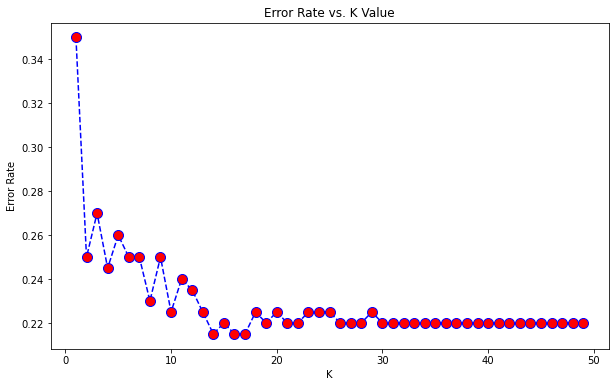

In [40]:
Knnxt = X_train
Knnyt = y_train
Knnxte= X_test 
Knnyte = y_test 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(Knnxt,Knnyt)
     pred_i = knn.predict(Knnxte)
     error_rate.append(np.mean(pred_i != Knnyte))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [41]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2).fit(Knnxt, Knnyt)

In [42]:
y_pred4 = knn.predict(Knnxte)
knn.score(Knnxte,Knnyte)

0.785

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Knnyte, y_pred4)
print(cm)

[[153   3]
 [ 40   4]]


In [44]:
# Visualising the Test set results
#from matplotlib.colors import ListedColormap
#X_set, y_set = X_test, y_test
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
        #             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
  #           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
  #  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
   #             c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('KNN (Test set)')
#plt.xlabel('Age')
#plt.ylabel('Income')
#plt.legend()
#plt.show()


In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [46]:
y_pred5 = nb.predict(X_test)
nb.score(X_test,y_test)

0.81

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred5)
print(cm)

[[131  25]
 [ 13  31]]


In [48]:
# Visualising the Test set results
#from matplotlib.colors import ListedColormap
#X_set, y_set = X_test, y_test
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 #                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
  #           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
 #   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
  #              c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('Naive Bayes (Test set)')
#plt.xlabel('Age')
#plt.ylabel('Income')
#plt.legend()
#plt.show()

In [49]:
df1

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,0,1000,1406.91,0.0,0,3,3,3.000000,...,1,2,1,71610,6510,13020.0,52080,1,2004,1
1,228,42,0,2000,1197.22,5000000.0,0,3,0,0.124685,...,0,0,0,5070,780,780.0,3510,3,2007,1
2,134,29,1,2000,1413.14,5000000.0,1,3,3,3.000000,...,2,3,0,34650,7700,3850.0,23100,0,2007,0
3,256,41,0,2000,1415.74,6000000.0,1,3,3,3.000000,...,1,2,0,63400,6340,6340.0,50720,3,2014,1
4,228,44,2,1000,1583.91,6000000.0,0,0,3,3.000000,...,0,1,0,6500,1300,650.0,4550,3,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0.0,1,3,3,1.000000,...,0,1,0,87200,17440,8720.0,61040,3,2006,0
996,285,41,1,1000,1436.79,0.0,1,3,1,3.000000,...,2,3,0,108480,18080,18080.0,72320,3,2015,0
997,130,34,0,500,1383.49,3000000.0,1,3,3,2.000000,...,2,3,1,67500,7500,7500.0,52500,2,1996,0
998,458,62,2,2000,1356.92,5000000.0,0,0,3,3.000000,...,0,1,1,46980,5220,5220.0,36540,3,1998,0


In [50]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df1)
df = sc.transform(df1)
pd.DataFrame(df1, columns = ['months_as_customer','age', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'incident_type', 'collision_type' ,'incident_severity' ,'authorities_contacted', 'incident_hour_of_the_day' ,'number_of_vehicles_involved' ,'property_damage' ,'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount' ,'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_year' ,'fraud_reported']).round()

AttributeError: 'dict' object has no attribute 'DataFrame'

C:\Users\1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


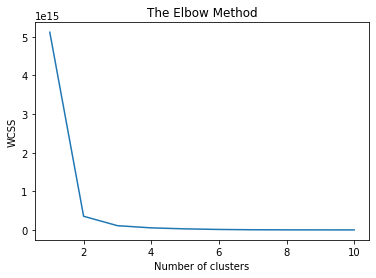

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

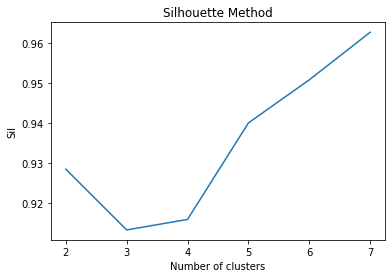

2:0.9283892934985504
3:0.913192250686431
4:0.9158166679159561
5:0.9399738230668349
6:0.9507586245763084
7:0.9626689205706127


In [53]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df1)  
  preds = kmeans.fit_predict(df1)
  sil.append(silhouette_score(df1, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [54]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df1)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df1)
pd.DataFrame(kms.cluster_centers_, columns = ['months_as_customer','age', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'incident_type', 'collision_type' ,'incident_severity' ,'authorities_contacted', 'incident_hour_of_the_day' ,'number_of_vehicles_involved' ,'property_damage' ,'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount' ,'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_year' ,'fraud_reported']).round()

AttributeError: 'dict' object has no attribute 'DataFrame'